<a href="https://colab.research.google.com/github/hyunjyyyy/smdata/blob/main/sm_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,643 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125080 files and dire

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_properties = fm.FontProperties(fname=font_path)
font_name = font_properties.get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] =False

program_filePath='1) 비교과 프로그램 정보.xlsx'

df_program=pd.read_excel(program_filePath, sheet_name='Sheet1')
df_metadata=pd.read_excel(program_filePath, sheet_name='데이터 설명')
df_user=pd.read_excel('2) 비교과 이수자 정보.xlsx')

df_total=pd.read_excel('3) 학생 수 통계.xlsx')

# 데이터 확인
# print(df_program.head())
# print(df_metadata)
# print(df_user.head())

In [ ]:
df_total=pd.read_excel('3) 학생 수 통계.xlsx')

In [ ]:
# 공통 키 찾기
print(df_program.columns)
print(df_user.columns)
print(df_total.columns)

Index(['프로그램ID', '프로그램세부ID', '프로그램명', '프로그램주제', '주관부서(상위)', '주관부서(하위)', '시작일',
       '종료일', '프로그램 소개', '프로그램 태그', '프로그램 구분', '프로그램유형1', '프로그램유형2', '교육방법',
       '프로그램 시간', '마일리지', '참여자수', '이수자수', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3',
       '핵심역량점수4', '핵심역량점수5', '핵심역량점수6', '핵심역량점수7', '핵심역량점수8'],
      dtype='object')
Index(['프로그램ID', '프로그램세부ID', '단과대학명', '전공명', '학년', '이수자ID', '만족도평균', '이수여부',
       '마일리지', '핵심역량점수1', '핵심역량점수2', '핵심역량점수3', '핵심역량점수4', '핵심역량점수5',
       '핵심역량점수6', '핵심역량점수7', '핵심역량점수8'],
      dtype='object')
Index(['단과대학명', '학과\n(전공)', '계열', '총 학생 수'], dtype='object')


In [ ]:
# 단과대학 별 총 학생수 집계
college_total = df_total.groupby('단과대학명')['총 학생 수'].sum().reset_index()

In [ ]:
# 데이터 합치기
merge_keys=['프로그램ID','프로그램세부ID']
df = pd.merge(df_user, df_program, on=merge_keys, how='outer')

In [ ]:
# df 확인
# df.info()
# df.head()

In [ ]:
df=df.dropna(subset='이수자ID') # 이수자 정보를 알 수 없으면 drop

# 결측치 처리
cols_to_fill = [col for col in df.columns if col.startswith('핵심역량점수')]
df[cols_to_fill] = df[cols_to_fill].fillna(0)
df['프로그램 구분']=df['프로그램 구분'].fillna('정보없음')

mean_satisfaction=df['만족도평균'].mean()
df['만족도평균']=df['만족도평균'].fillna(mean_satisfaction)

# 새 컬럼 생성
df['프로그램 진행기간']=(df['종료일']-df['시작일']).dt.days

df.isnull().sum()

,0
프로그램ID,0
프로그램세부ID,0
단과대학명,0
전공명,0
학년,0
이수자ID,0
만족도평균,0
이수여부,0
마일리지_x,0
핵심역량점수1_x,0


In [ ]:
# '전공명' 컬럼의 모든 고유값을 리스트로 확인
unique_majors = df['전공명'].unique()
print(unique_majors)

['경영학부' '공예과' '아동복지학부' '경제학부' '산업디자인과' '역사문화학과' '중어중문학부' '회화과' '영어영문학전공'
 '문화관광학전공' '화학과' '생명시스템학부' '일본학과' 'IT공학전공' '무용과' '정치외교학과' '통계학과' '문헌정보학과'
 '교육학부' '식품영양학과' '프랑스언어·문화학과' '테슬(TESL)전공' '법학부' '의류학과' '가족자원경영학과' '피아노과'
 '앙트러프러너십전공' '수학과' '시각·영상디자인과' '관현악과' '독일언어·문화학과' '사회심리학과' '화공생명공학부' '성악과'
 '컴퓨터과학전공' '미디어학부' '한국어문학부' '홍보광고학과' '전자공학전공' '응용물리전공' '약학부' '소비자경제학과'
 '환경디자인과' '르꼬르동블루외식경영전공' '행정학과' '기계시스템학부' '체육교육과' '소프트웨어융합전공' '작곡과'
 '글로벌협력전공' '데이터사이언스전공' '신소재물리전공' '인공지능공학부' '지능형전자시스템전공' '컴퓨터과학전공(첨단)'
 '기초공학부' '글로벌융합학부' '첨단소재·전자융합공학부' '자유전공학부' '영어영문학부' '첨단공학부' '소프트웨어학부'
 'ICT융합공학부' '소프트웨어학부(첨단)' '문화관광외식학부' '글로벌서비스학부']


In [ ]:
# 1. (★신규★) 제공해주신 15개 대분류 매핑 딕셔너리
major_map = {
    # 1. 자유전공
    '자유전공학부': '자유전공',

    # 2. 글로벌
    '글로벌협력전공': '글로벌',
    '글로벌서비스학부': '글로벌',

    # 3. 미디어학부
    '미디어학부': '미디어학부',
    '홍보광고학과': '미디어학부',

    # 4. 사회과학
    '아동복지학부': '사회과학',
    '역사문화학과': '사회과학',
    '문화관광학전공': '사회과학',
    '문헌정보학과': '사회과학',
    '식품영양학과': '사회과학',
    '의류학과': '사회과학',
    '가족자원경영학과': '사회과학',
    '사회심리학과': '사회과학',
    '정치외교학과': '사회과학',
    '교육학부': '사회과학',

    # 5. 약학대학
    '약학부': '약학대학',

    # 6. 법학대학
    '법학부': '법학대학',
    '행정학과': '법학대학',

    # 7. 외식경영
    '르꼬르동블루외식경영전공': '외식경영',
    '문화관광외식학부': '외식경영',

    # 8. 유학생
    '글로벌융합학부': '유학생',

    # 9. 경상대학
    '경영학부': '경상대학',
    '경제학부': '경상대학',
    '앙트러프러너십전공': '경상대학',
    '소비자경제학과': '경상대학',

    # 10. 공학대학
    '화공생명공학부': '공학대학',
    '전자공학전공': '공학대학',
    '응용물리전공': '공학대학',
    '신소재물리전공': '공학대학',
    '지능형전자시스템전공': '공학대학',
    '기초공학부': '공학대학',
    '첨단공학부': '공학대학',
    '기계시스템학부': '공학대학',
    '첨단소재·전자융합공학부': '공학대학',

    # 11. 이과대학
    '화학과': '이과대학',
    '생명시스템학부': '이과대학',
    '통계학과': '이과대학',
    '수학과': '이과대학',

    # 12. 어문계열
    '중어중문학부': '어문계열',
    '영어영문학전공': '어문계열',
    '일본학과': '어문계열',
    '프랑스언어·문화학과': '어문계열',
    '테슬(TESL)전공': '어문계열',
    '독일언어·문화학과': '어문계열',
    '한국어문학부': '어문계열',
    '영어영문학부': '어문계열',

    # 13. 체육대학
    '무용과': '체육대학',
    '체육교육과': '체육대학',

    # 14. 미술대학
    '산업디자인과': '미술대학',
    '회화과': '미술대학',
    '시각·영상디자인과': '미술대학',
    '환경디자인과': '미술대학',
    '공예과': '미술대학',

    # 15. IT계열
    'IT공학전공': 'IT계열',
    '컴퓨터과학전공': 'IT계열',
    '소프트웨어융합전공': 'IT계열',
    '데이터사이언스전공': 'IT계열',
    '컴퓨터과학전공(첨단)': 'IT계열',
    '소프트웨어학부': 'IT계열',
    'ICT융합공학부': 'IT계열',
    '소프트웨어학부(첨단)': 'IT계열',
    '인공지능공학부': 'IT계열',

    '피아노과': '음악대학',
    '관현악과': '음악대학',
    '성악과' : '음악대학',
    '작곡과' : '음악대학'
  }

  # 1. 원본 'df'에 새 컬럼('전공_대분류') 만들기
df['전공_대분류'] = df['전공명'].map(major_map)

# 2. 'df_analysis'에도 동일하게 적용
# (df_analysis는 df를 필터링해서 만들었으므로, 이 컬럼도 같이 따라옵니다.)
# (만약 따로 만들었다면 이 코드도 실행: df_analysis['전공_대분류'] = df_analysis['전공명'].map(major_map))

# 3. (★중요★) 맵핑이 안 된 학과가 있는지 확인 (NaN 값 확인)
#    결과가 비어있어야(Empty) 딕셔너리가 완벽하게 적용된 것입니다.
unmapped_majors = df[df['전공_대분류'].isnull()]['전공명'].value_counts()
if unmapped_majors.empty:
    print("✅ 모든 전공이 성공적으로 대분류에 매핑되었습니다.")
else:
    print("⚠️ [경고] 다음 전공이 1단계 딕셔너리에 빠졌습니다. 추가해주세요:")
    print(unmapped_majors)

✅ 모든 전공이 성공적으로 대분류에 매핑되었습니다.


In [ ]:
# 법정의무교육은 필수이므로 추천시스템 eda에서 제외
except_keywords = ['법정의무']
exception = df['프로그램유형2'].str.contains('|'.join(except_keywords), na=False)

# 메인분석 데이터
df_analysis = df[exception == False].copy()

## 데이터 분석

### 프로그램 태그 정량화

In [ ]:
# 쉼표로 split
df_analysis['태그_리스트'] = df_analysis['프로그램 태그'].str.split(',')

# df_tags 생성 : 태그 분석용
df_tags = df_analysis.explode('태그_리스트').reset_index(drop=True)

df_tags['태그'] = df_tags['태그_리스트'].str.strip()

df_tags = df_tags[df_tags['태그'] != '']
df_tags = df_tags.drop(columns=['태그_리스트', '프로그램 태그'])

### 프로그램 태그 비교


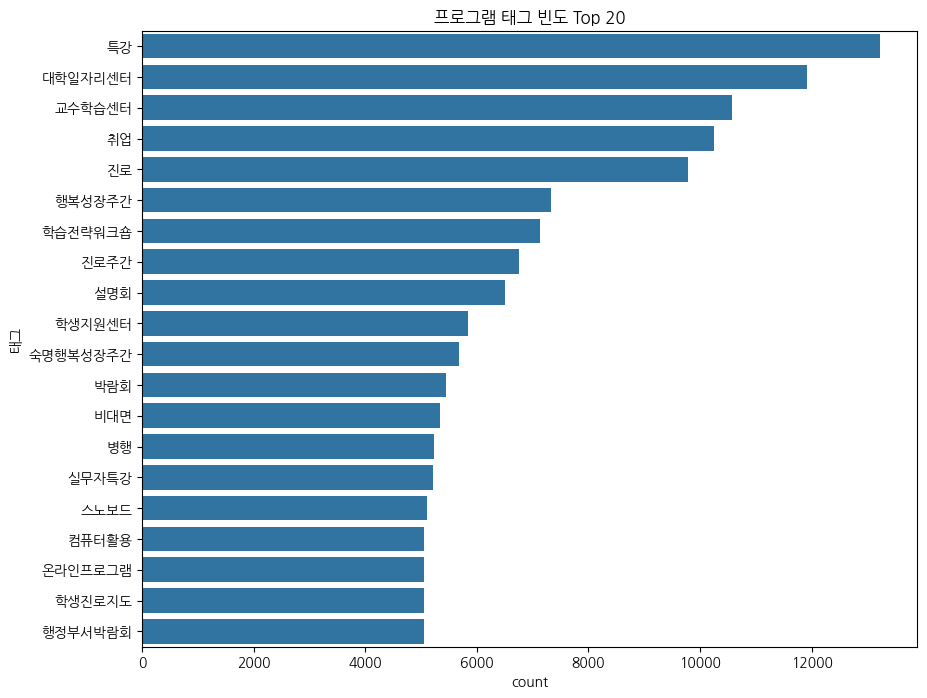

In [ ]:
# 신청 TOP 20 태그
plt.figure(figsize=(10, 8))
sns.countplot(data=df_tags,
              y='태그',  # y축에 태그
              order=df_tags['태그'].value_counts().head(20).index)
plt.title('프로그램 태그 빈도 Top 20')
plt.show()

/tmp/ipython-input-1944164583.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tags_supply = df_tags_supply[df_tags['태그'] != '']


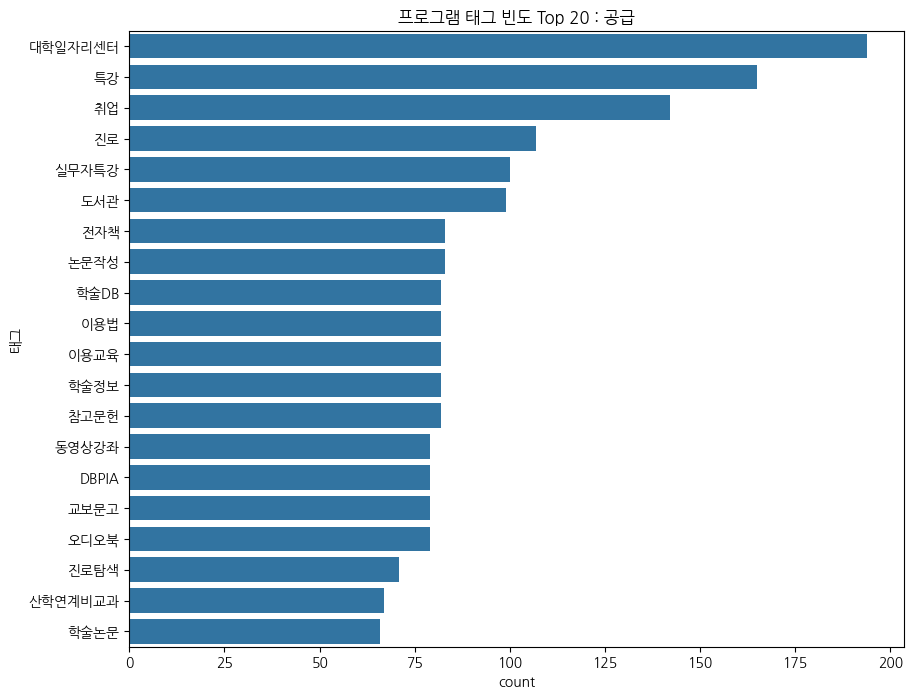

In [ ]:
# 쉼표로 split
df_program['태그_리스트'] = df_program['프로그램 태그'].str.split(',')

# df_tags_supply 생성 : 태그 분석용
df_tags_supply = df_program.explode('태그_리스트').reset_index(drop=True)

df_tags_supply['태그'] = df_tags_supply['태그_리스트'].str.strip()

df_tags_supply = df_tags_supply[df_tags['태그'] != '']
df_tags_supply = df_tags_supply.drop(columns=['태그_리스트', '프로그램 태그'])

# 공급 태그 분석
plt.figure(figsize=(10, 8))
sns.countplot(data=df_tags_supply,
              y='태그',  # y축에 태그
              order=df_tags_supply['태그'].value_counts().head(20).index)
plt.title('프로그램 태그 빈도 Top 20 : 공급')
plt.show()

### 프로그램 설명 분석

In [ ]:
# 프로그램 설명 키워드 추출
!pip install konlpy
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 36.8 MB/s eta 0:00:00


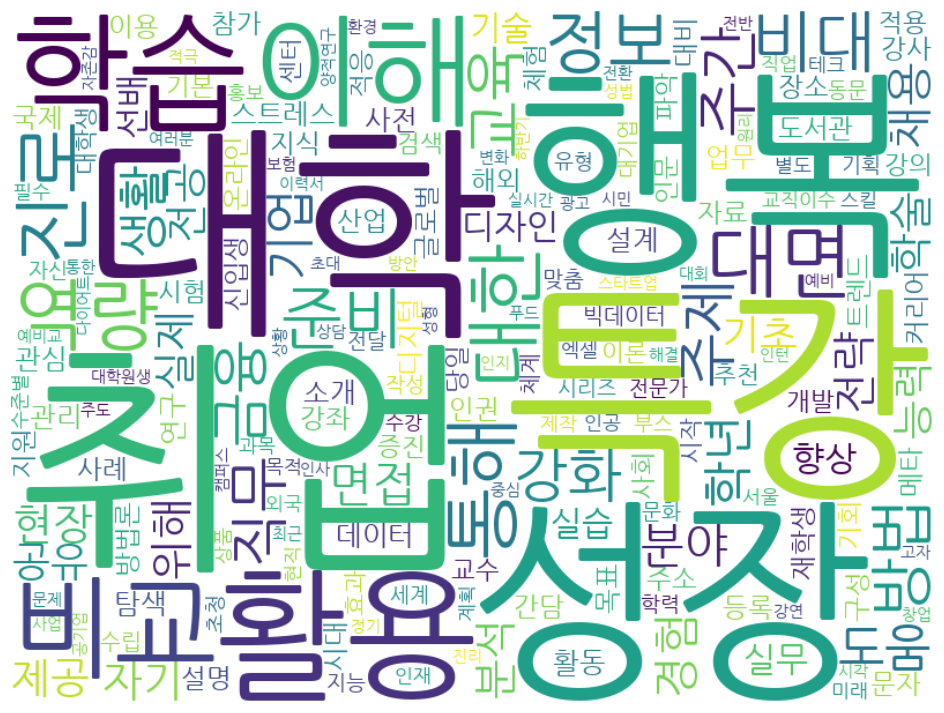

In [ ]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import re

# 1. Okt 형태소 분석기 객체 생성
okt = Okt()
stop_words = {
    '프로그램', '숙명', '학생', '신청', '안내', '관련', '과정', '모집',
    '우리', '학교', '진행', '운영', '대상', '참여',
    '및', '을', '를', '은', '는', '이', '가', '의', '에', '와', '과', '대해','통'
}

# 2. '프로그램 소개'의 모든 텍스트를 하나로 합치기 (결측치 제외)
text = ' '.join(df_analysis['프로그램 소개'].dropna())
cleaned_text = re.sub(r'[^가-힣a-zA-Z0-9\s]','',text)

# 3. 텍스트에서 '명사'만 추출
nouns = okt.nouns(cleaned_text)

# 4. (정제) 2글자 이상의 명사만 선택 (e.g., '것', '수', '이' 등 불용어 제외)
nouns = [n for n in nouns if len(n) > 1]

filtered_nouns = [
    n for n in nouns
    if len(n) > 1 and n not in stop_words
]
# 5. 명사 빈도수 계산
count = Counter(filtered_nouns)

# 6. 워드클라우드 생성 (한글 폰트 경로 지정 필수)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 👈 본인 환경에 맞게 수정

wc = WordCloud(font_path=font_path,
               background_color='white',
               width=800,
               height=600)

cloud = wc.generate_from_frequencies(dict(count))

# 7. 시각화
plt.figure(figsize=(12, 9))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, '학년 별 참여 횟수')

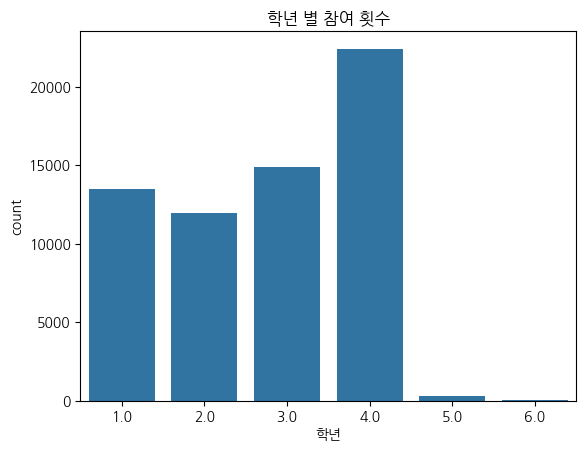

In [ ]:
sns.countplot(data=df_analysis,x='학년')
plt.title('학년 별 참여 횟수')

Text(0.5, 1.0, '단과대별 참여 횟수')

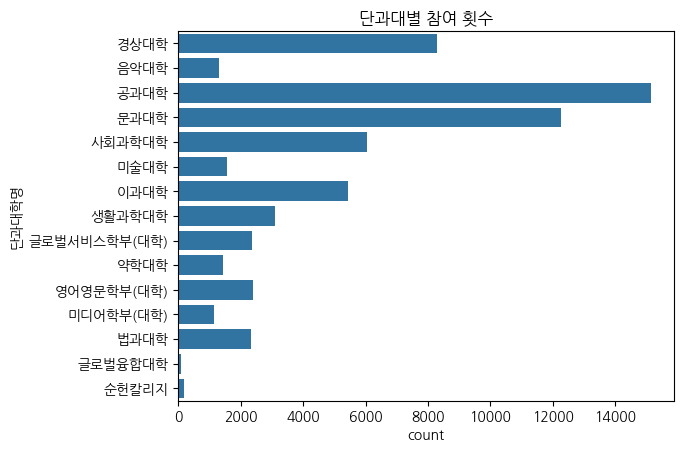

In [ ]:
sns.countplot(data=df_analysis,y='단과대학명')
plt.title('단과대별 참여 횟수')

Text(0.5, 1.0, '실제 수요 프로그램유형2')

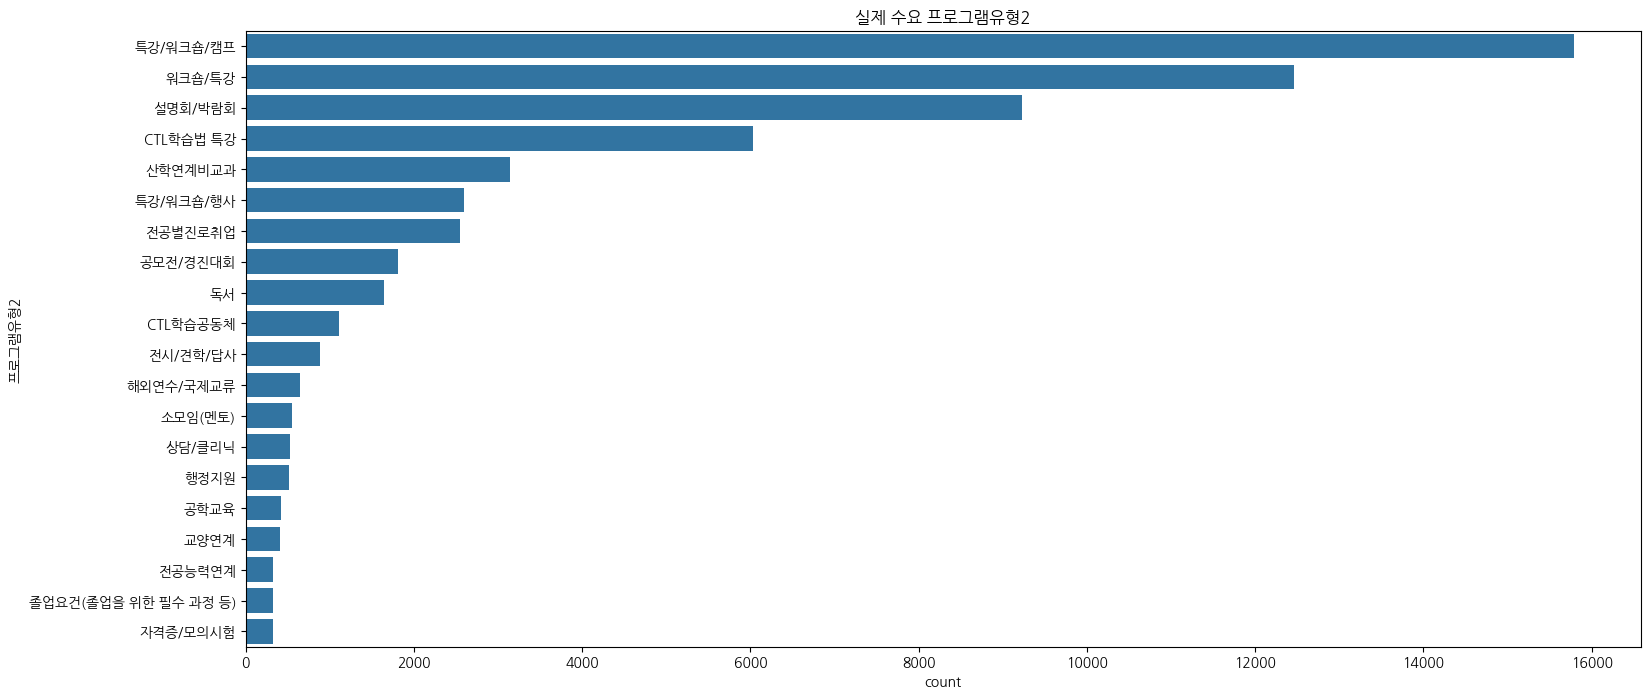

In [ ]:
plt.figure(figsize=(18,8))

sns.countplot(data=df_analysis,y='프로그램유형2',order=df_analysis['프로그램유형2'].value_counts().head(20).index)
plt.title('실제 수요 프로그램유형2')

Text(0.5, 1.0, '공급 프로그램유형2')

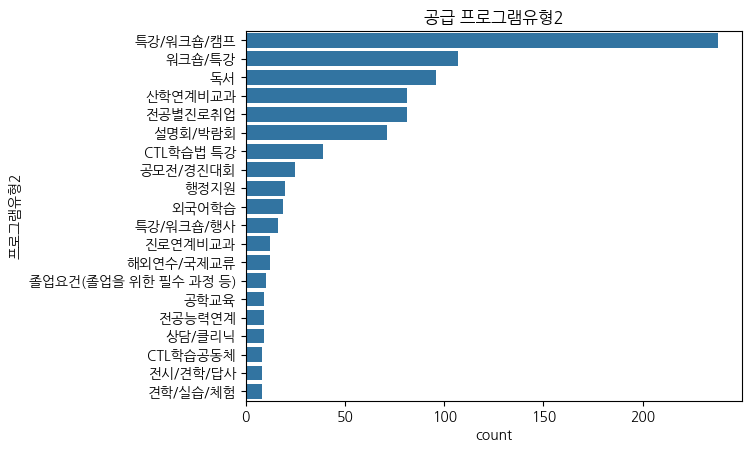

In [ ]:
sns.countplot(data=df_program, y='프로그램유형2',order=df_program['프로그램유형2'].value_counts().head(20).index)
plt.title('공급 프로그램유형2')

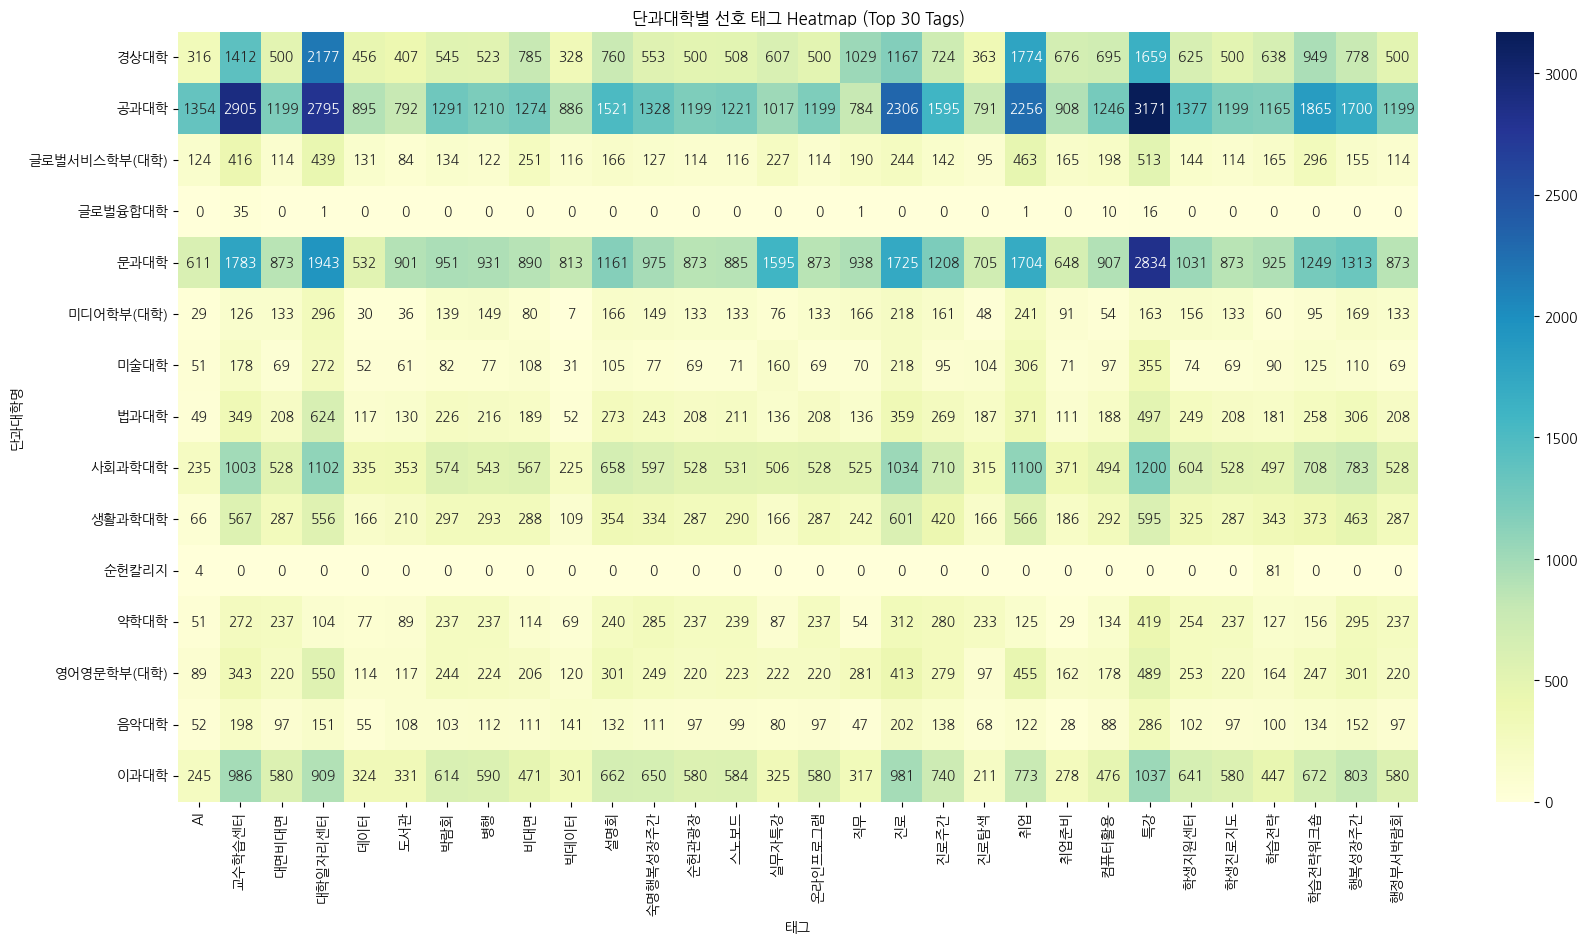

In [ ]:
top_tags = df_tags['태그'].value_counts().head(30).index
df_tags_heatmap = df_tags[df_tags['태그'].isin(top_tags)]

# 2. (핵심) 단과대학(index) vs 태그(columns) 교차표(Crosstab) 생성
crosstab_df = pd.crosstab(df_tags_heatmap['단과대학명'],
                          df_tags_heatmap['태그'])

# 3. (시각화) 히트맵 그리기
plt.figure(figsize=(20, 10)) # 가로를 길게
sns.heatmap(crosstab_df,
            annot=True,     # 칸에 숫자 표시
            fmt='d',        # 정수로 표시
            cmap='YlGnBu')  # 색상 테마 (노랑-초록-파랑)
plt.title('단과대학별 선호 태그 Heatmap (Top 30 Tags)')
plt.show()

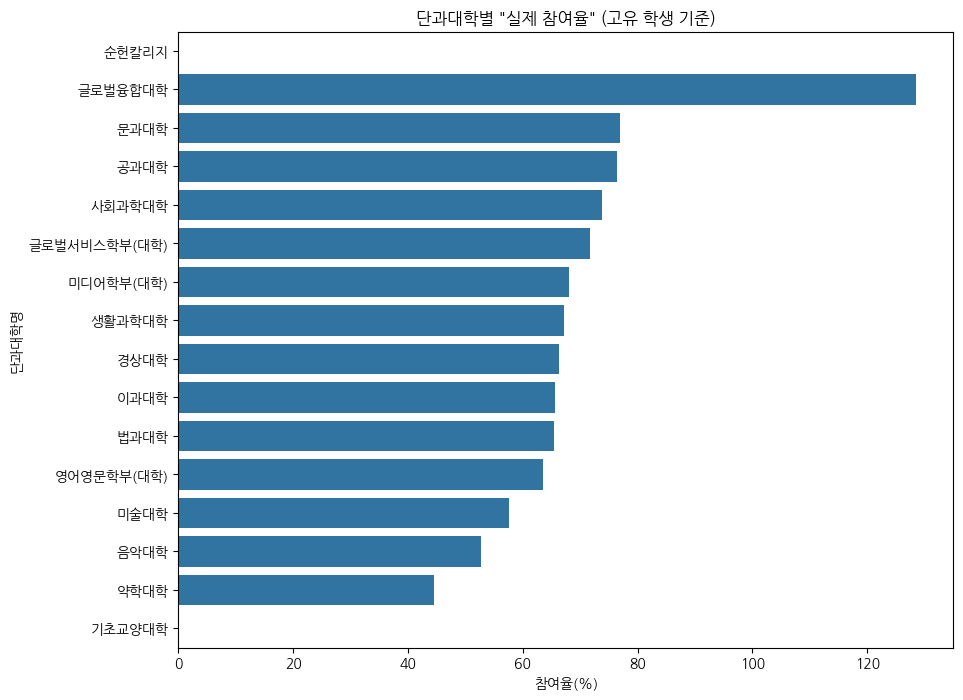

In [ ]:
# 1. (★수정★) 단과대학별 "참여한 *고유 학생 수*" 집계
# ('이수자ID'는 실제 학생 ID 컬럼명으로 바꿔주세요)
college_unique_students = df_analysis.groupby('단과대학명')['이수자ID'].nunique().reset_index(name='참여_학생_수(고유)')

# 3. (★수정★) 'college_total'을 기준으로 'how='left''로 병합
df_college_ratio = pd.merge(college_total, # <-- 기준 테이블 (왼쪽)
                            college_unique_students,
                            on='단과대학명',
                            how='left') # <-- left join

# 3. "진짜 참여율" 계산 (이제 100%를 넘지 않습니다)
df_college_ratio['참여율(%)'] = (df_college_ratio['참여_학생_수(고유)'] / df_college_ratio['총 학생 수']) * 100

# 4. (EDA) 참여율 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=df_college_ratio.sort_values('참여율(%)', ascending=False),
            y='단과대학명',
            x='참여율(%)')
plt.title('단과대학별 "실제 참여율" (고유 학생 기준)')
plt.show()

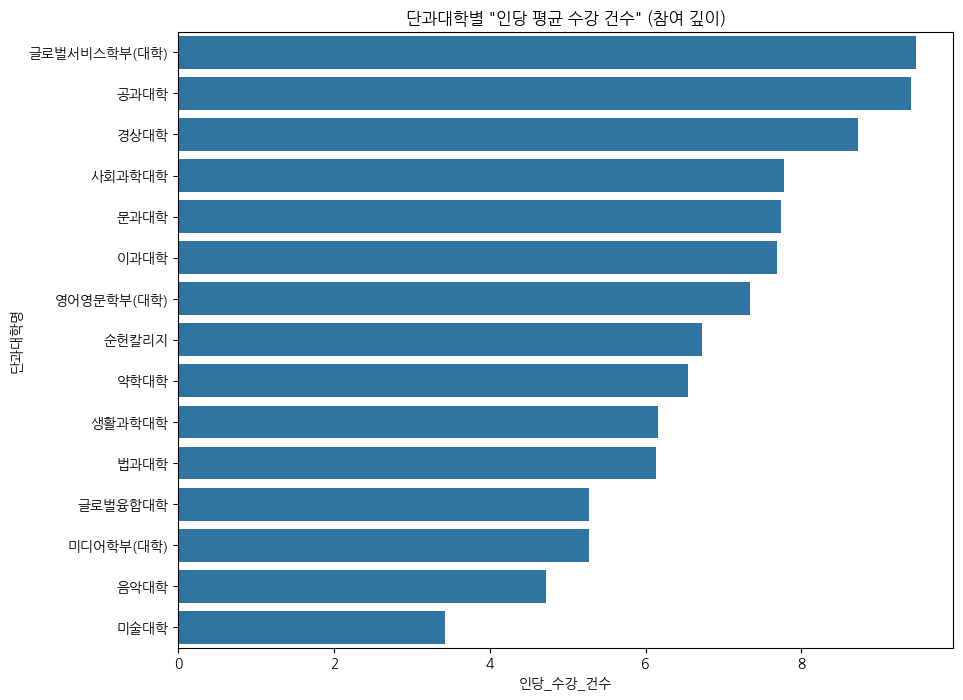

In [ ]:
# 1. '총 등록 건수' (size)
college_counts = df_analysis.groupby('단과대학명').size().reset_index(name='총_등록_건수')

# 2. '고유 학생 수' (nunique)
college_unique_students = df_analysis.groupby('단과대학명')['이수자ID'].nunique().reset_index(name='참여_학생_수(고유)')

# 3. 두 데이터 병합
df_college_engagement = pd.merge(college_counts, college_unique_students, on='단과대학명')

# 4. (★핵심★) "인당 평균 수강 건수" 계산
df_college_engagement['인당_수강_건수'] = df_college_engagement['총_등록_건수'] / df_college_engagement['참여_학생_수(고유)']

# 5. (EDA) 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=df_college_engagement.sort_values('인당_수강_건수', ascending=False),
            y='단과대학명',
            x='인당_수강_건수')
plt.title('단과대학별 "인당 평균 수강 건수" (참여 깊이)')
plt.show()

In [ ]:
# 1. '프로그램 소개' 컬럼에 '졸업요건' 키워드가 포함되었는지 (True/False)
# (결측치(NaN)가 있어도 오류가 나지 않게 na=False 처리)
cond1_keyword = df_analysis['프로그램유형2'].str.contains('졸업요건', na=False)

# 2. '주관부서'와 학생의 '전공명'이 일치하는지 (True/False)
cond2_major = (df_analysis['주관부서(하위)'] == df_analysis['전공명'])

# 3. (★핵심★) 두 조건을 모두 만족(AND)하는 데이터만 필터링
df_grad_req = df_analysis[cond1_keyword & cond2_major].copy()

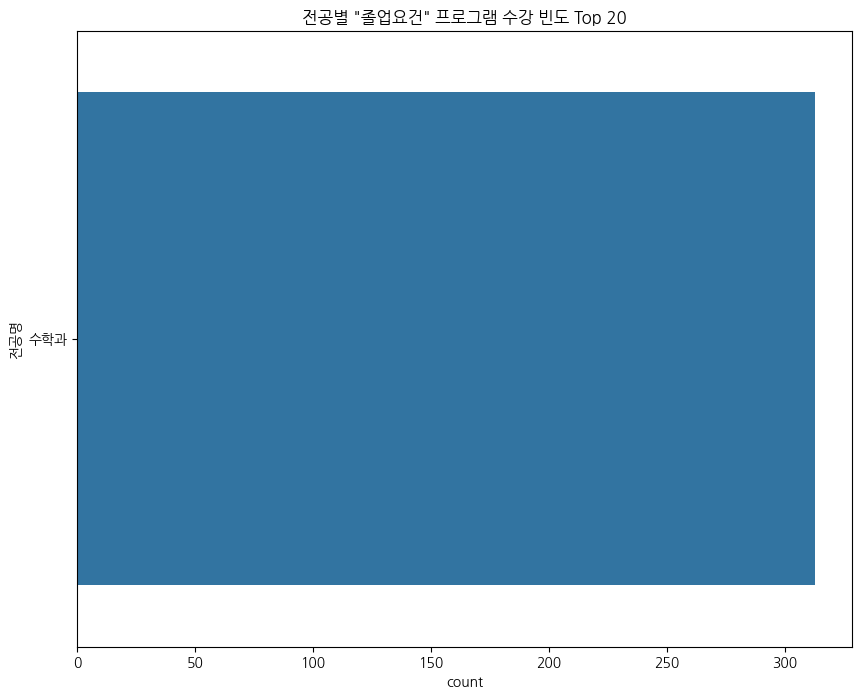

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_grad_req,
              y='전공명',  # 또는 '주관부서'
              order=df_grad_req['전공명'].value_counts().head(20).index)
plt.title('전공별 "졸업요건" 프로그램 수강 빈도 Top 20')
plt.show()

# 추천 알고리즘 개발

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 1. '전공명'을 행(index), '프로그램명'을 열(column)로 하는 교차표 생성
#    값은 각 전공이 해당 프로그램을 수강한 "건수"입니다.
crosstab_major_program = pd.crosstab(df_analysis['전공명'],
                                     df_analysis['프로그램명'])

# (확인) (예: 150개 전공 x 1000개 프로그램) 형태의 행렬이 나옵니다.
# print(crosstab_major_program.shape)

In [ ]:
# 1. 'sklearn'의 코사인 유사도 함수를 사용합니다.
#    (결과: 전공 x 전공 개수의 유사도 점수 행렬)
major_sim_matrix = cosine_similarity(crosstab_major_program)

# 2. (중요) 결과를 보기 쉽게 DataFrame으로 변환
#    인덱스와 컬럼 모두 '전공명'이 됩니다.
major_sim_df = pd.DataFrame(major_sim_matrix,
                          index=crosstab_major_program.index,
                          columns=crosstab_major_program.index)

# (확인) '컴퓨터공학과' 행, '소프트웨어학과' 열의 값을 보면 유사도 점수가 나옵니다.
# print(major_sim_df.head())

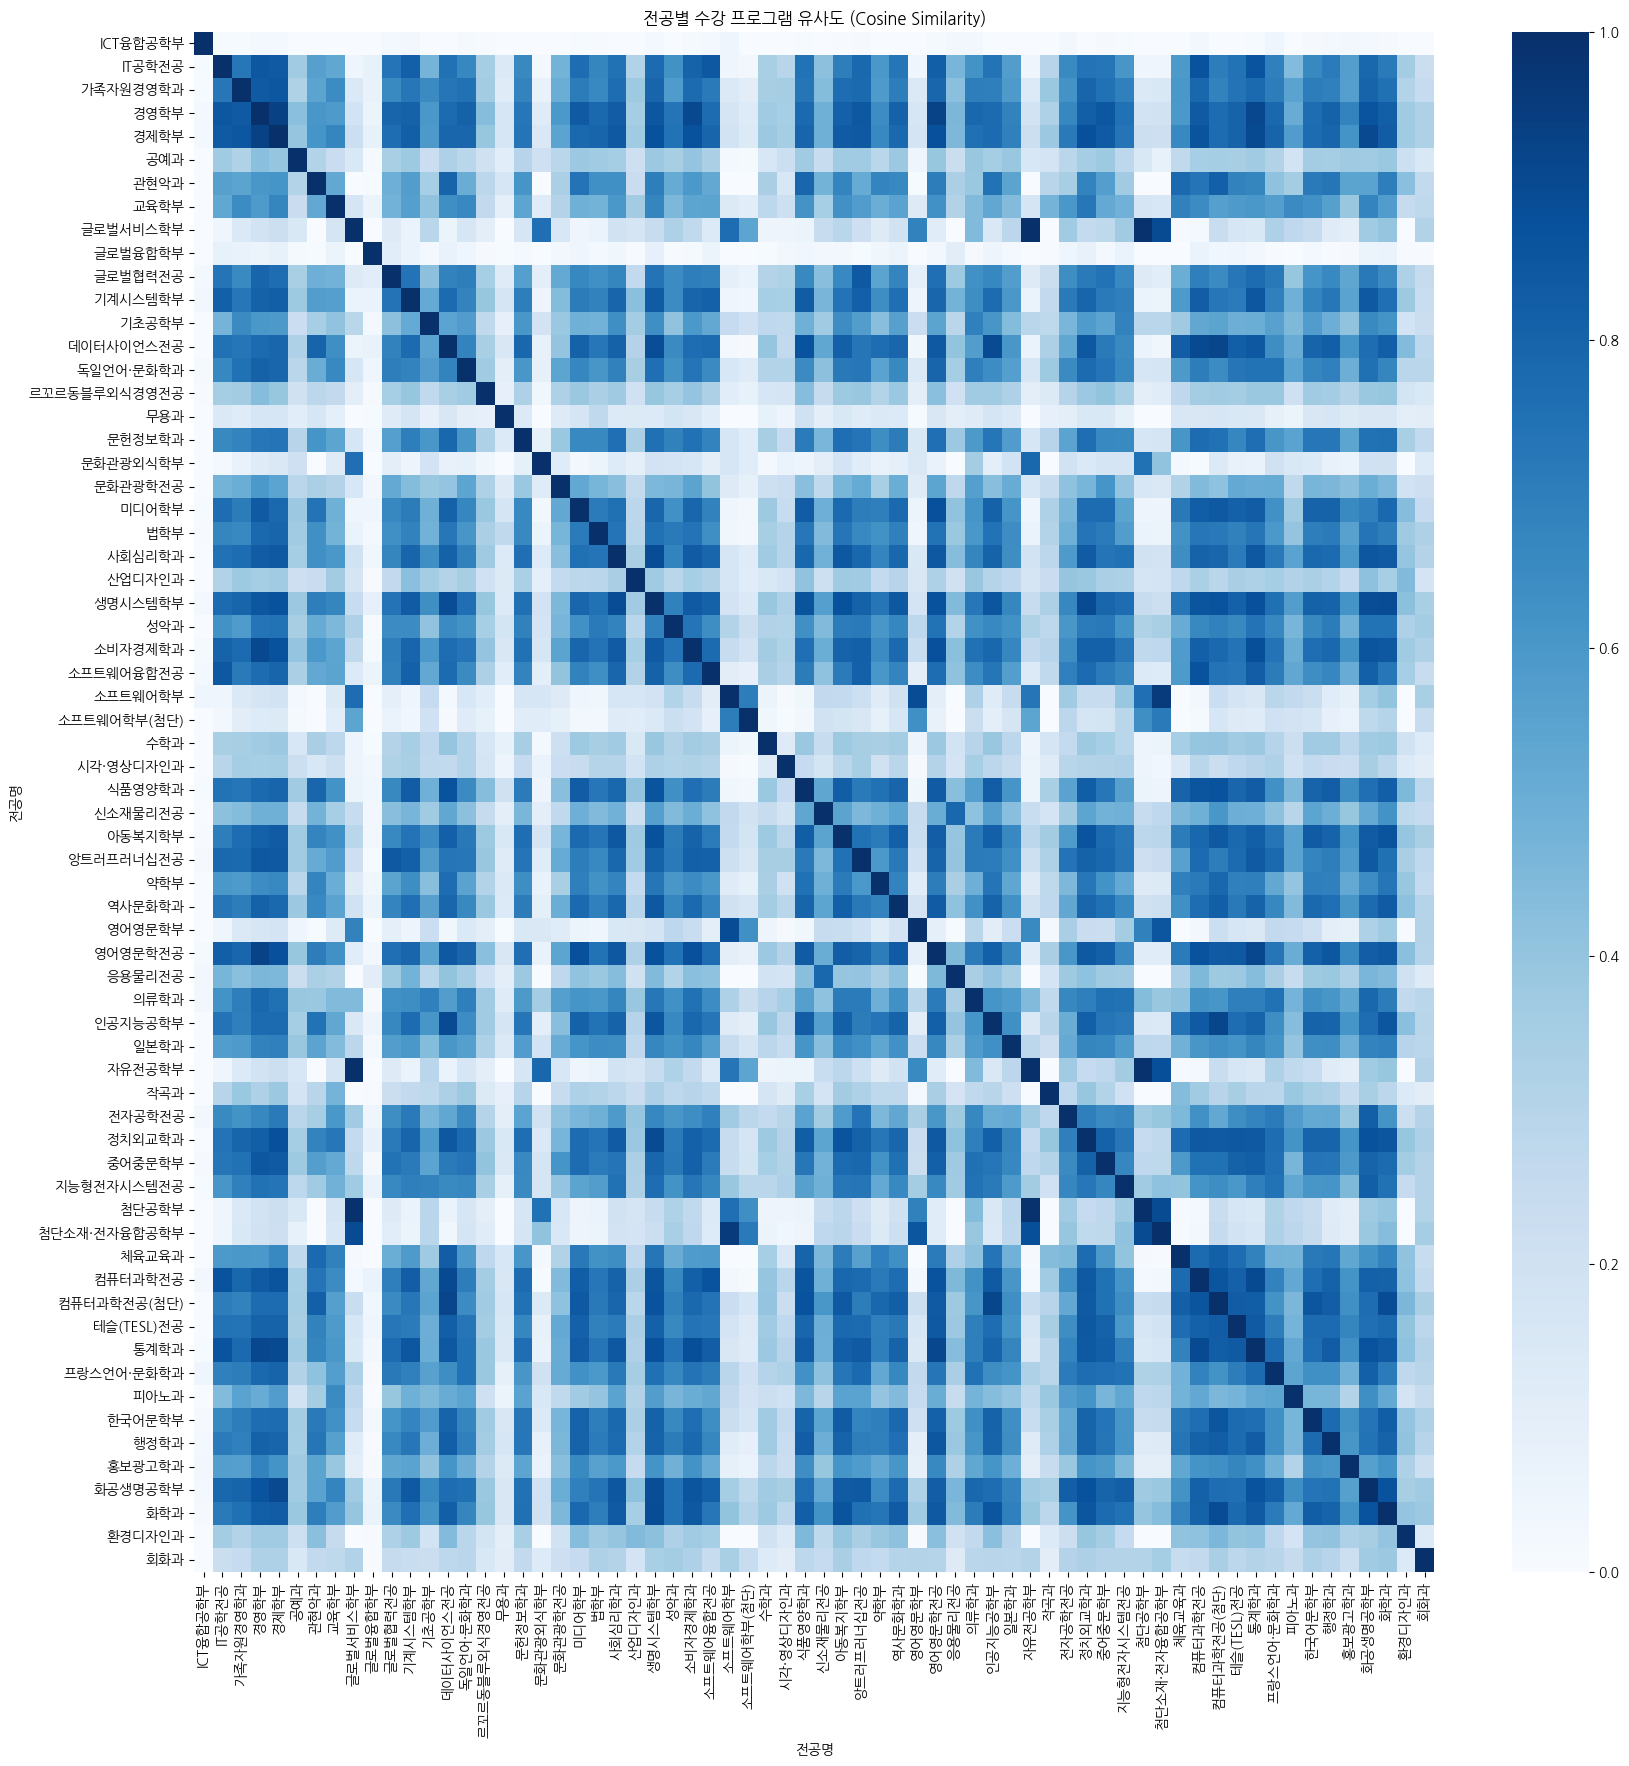

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20)) # (전공 수에 따라 크기 조절)
sns.heatmap(major_sim_df,
            cmap='Blues', # 파란색 계열
            annot=False)  # (숫자는 너무 많으니 뺍니다)
plt.title('전공별 수강 프로그램 유사도 (Cosine Similarity)')
plt.show()

## 같은 전공 학생들이 가장 많이 들은 강의 추천 (협업 필터링)

In [ ]:
# --- (A) '추천 DB' 생성 (대분류 기준) ---

# 1. 'df_analysis'에서 "전공_대분류"별 인기 프로그램 순위표 생성
major_group_popularity = df_analysis.groupby('전공_대분류')['프로그램명'].value_counts()

# 2. DataFrame으로 변환
major_group_db = major_group_popularity.rename('수강 건수').reset_index()

print("\n--- 전공 대분류별 인기 프로그램 DB (예시) ---")
print(major_group_db.head())
#   전공_대분류        프로그램명      수강 건수
# 0   IT계열           AI 입문         350  <-- (컴공, 소융, AI학과 합산)
# 1   IT계열           파이썬 기초       280
# 2   경상대학         데이터분석입문     160
# 3   경상대학         마케팅원론        130


# --- (B) '사용자 이력' DB 생성 (대분류 기준) ---

# 1. 사용자(이수자ID)별 수강 목록 (이건 동일)
user_taken_map = df.groupby('이수자ID')['프로그램명'].apply(set).to_dict()

# 2. 사용자(이수자ID)의 "전공_대분류" 매핑 (★수정★)
user_major_group_map = df.drop_duplicates(subset=['이수자ID']).set_index('이수자ID')['전공_대분류'].to_dict()

print("\n추천 엔진용 DB 생성 완료! (대분류 기준)")


# --- (C) 추천 함수 정의 (대분류 기준) ---

def get_major_group_recommendations(user_id, top_n=10,
                                    program_db=major_group_db,
                                    majors_map=user_major_group_map,
                                    taken_map=user_taken_map):
    """
    특정 이수자ID를 받아, 같은 "전공 대분류" 학생들이 많이 들은 프로그램을 추천합니다.
    """

    # 1. 사용자의 "전공_대분류" 찾기
    user_major_group = majors_map.get(user_id)
    if not user_major_group:
        # 딕셔너리에 없는 학과(예: '국악과')는 NaN이 될 수 있음
        return f"Error: {user_id}의 전공 대분류를 찾을 수 없습니다. (매핑 확인 필요)"

    # 2. "전공_대분류"에 해당하는 인기 프로그램 순위표 조회
    major_group_top_programs = program_db[program_db['전공_대분류'] == user_major_group]

    if major_group_top_programs.empty:
        return f"{user_major_group}의 추천 데이터가 없습니다."

    # 3. 사용자가 이미 수강한 프로그램 목록(set) 조회
    taken_programs = taken_map.get(user_id, set())

    # 4. 인기 순위표에서 "아직 안 들은" 프로그램만 필터링
    recommendations_df = major_group_top_programs[
        ~major_group_top_programs['프로그램명'].isin(taken_programs)
    ]

    # 5. 상위 top_n개의 프로그램명만 리스트로 반환
    final_recommendations = recommendations_df.head(top_n)['프로그램명'].tolist()

    return final_recommendations

# --- (D) 함수 실행 ---
target_user = '280385-4769205' # (이 부분에 실제 이수자ID를 넣으세요)

recs = get_major_group_recommendations(target_user, top_n=5)

print(f"\n--- {target_user}님 (전공 그룹: {user_major_group_map.get(target_user)})을 위한 맞춤 추천 ---")
for i, program_name in enumerate(recs):
    print(f"{i+1}. {program_name}")


--- 전공 대분류별 인기 프로그램 DB (예시) ---
  전공_대분류                           프로그램명  수강 건수
0   IT계열                 2024-2 숙명행복성장주간    833
1   IT계열                 2024-1 숙명행복성장주간    211
2   IT계열  [재맞고] 2024년 여름방학 글로벌 역량강화 프로그램    180
3   IT계열     2024 여름방학 양적연구방법론 (SPSS 활용)    165
4   IT계열                메타인지 특강: 학교 인사이드    164

추천 엔진용 DB 생성 완료! (대분류 기준)

--- 280385-4769205님 (전공 그룹: 이과대학)을 위한 맞춤 추천 ---
1. 2024-2 숙명행복성장주간
2. 2024-1학기 수학과 콜로키움
3. 2024-2학기 수학과 콜로키움
4. 2025 새내기를 위한 맞춤형 기초학력강화 워크숍
5. 2024 여름방학 양적연구방법론 (SPSS 활용)


## 개인화 태그 top3 기반 추천

In [ ]:
# Colab에 OpenJDK 11 (Java) 설치
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [ ]:
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter

# --- 0. (준비) Okt 객체 및 불용어 리스트 정의 ---
# (이전에 사용한 것을 그대로 씁니다)
okt = Okt()
stop_words = {
    '프로그램', '숙명', '학생', '신청', '안내', '관련', '과정', '모집', '센터', '학습', '교수',
    '우리', '학교', '진행', '운영', '대상', '참여', '회차', '장소', '후','활용', '대학',
    '및', '을', '를', '은', '는', '이', '가', '의', '에', '와', '과', '대해', '통'
}

# --- 1. (중요) '프로그램 마스터' 테이블 생성 ---
# 원본 df에서 프로그램ID 기준으로 중복을 제거한, 고유한 프로그램 리스트
df_programs = df.drop_duplicates(subset=['프로그램ID'])[[
    '프로그램ID', '프로그램명', '프로그램 태그', '프로그램 소개'
]].copy()

# --- 2. (핵심) 모든 프로그램의 '키워드'를 추출하는 함수 ---
def process_text_to_keywords(row):
    # 2a. 태그와 소개글을 합칩니다.
    tags = str(row['프로그램 태그']).replace(',', ' ') # 쉼표를 공백으로
    desc = str(row['프로그램 소개'])
    full_text = tags + " " + desc

    # 2b. 정제
    cleaned_text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', full_text)

    # 2c. 명사 추출
    nouns = okt.nouns(cleaned_text)

    # 2d. 불용어 제거 및 2글자 이상 단어만
    filtered_nouns = [
        n for n in nouns
        if len(n) > 1 and n not in stop_words
    ]

    # 2e. (중요) 빠른 검색을 위해 set으로 반환
    return set(filtered_nouns)

# --- 3. (실행) 'processed_keywords' 컬럼 생성 ---
# (프로그램이 많으면 몇 분 정도 걸릴 수 있습니다)
print("지금부터 모든 프로그램의 키워드 분석을 시작합니다...")
df_programs['processed_keywords'] = df_programs.apply(process_text_to_keywords, axis=1)

# --- 4. (필수) 사용자 이력 DB (필터링용) ---
# (이수자ID : {수강한 프로그램ID set})
user_taken_id_map = df.groupby('이수자ID')['프로그램ID'].apply(set).to_dict()

print("--- '프로그램-키워드' DB 구축 완료! ---")
# print(df_programs[['프로그램명', 'processed_keywords']].head())

지금부터 모든 프로그램의 키워드 분석을 시작합니다...
--- '프로그램-키워드' DB 구축 완료! ---


In [ ]:
def get_keyword_recommendations(user_id, top_n=10,
                                programs_db=df_programs,
                                taken_map=user_taken_id_map):
    """
    특정 이수자ID의 Top 3 키워드와 연관된 프로그램을 추천합니다.
    """

    # --- A. (User Profiling) 사용자의 Top 3 키워드 찾기 ---

    # 1. 사용자가 수강한 '프로그램ID' 목록
    taken_program_ids = taken_map.get(user_id, set())

    if not taken_program_ids:
        return f"Error: {user_id}의 수강 기록이 없습니다."

    # 2. 수강한 프로그램들의 'processed_keywords' (set)를 가져옴
    user_programs_keywords = programs_db[programs_db['프로그램ID'].isin(taken_program_ids)]['processed_keywords']

    # 3. 모든 키워드를 하나의 리스트로 합침
    user_keywords_list = []
    for keyword_set in user_programs_keywords:
        user_keywords_list.extend(list(keyword_set))

    # 4. 빈도수 계산
    keyword_counts = Counter(user_keywords_list)

    # 5. Top 3 키워드 추출
    top_3_keywords = [kw for kw, count in keyword_counts.most_common(5)]

    if not top_3_keywords:
        return f"Error: {user_id}의 유의미한 키워드를 찾을 수 없습니다."

    # --- B. (Scoring) 모든 프로그램에 '연관성 점수' 매기기 ---

    def calculate_score(program_keywords_set):
        score = 0
        for top_kw in top_3_keywords:
            if top_kw in program_keywords_set:
                score += 1 # Top 3 키워드가 포함될 때마다 +1점
        return score

    programs_db['relevance_score'] = programs_db['processed_keywords'].apply(calculate_score)

    # --- C. (Filtering & Ranking) 필터링 및 정렬 ---

    # 1. "아직 안 들은" 프로그램만 필터링
    recommendations_df = programs_db[
        ~programs_db['프로그램ID'].isin(taken_program_ids)
    ]

    # 2. "점수가 0보다 크고" (Top 3 키워드가 1개라도 포함)
    recommendations_df = recommendations_df[recommendations_df['relevance_score'] > 0]

    # 3. 점수(relevance_score) 기준으로 최종 정렬
    recommendations_df = recommendations_df.sort_values(by='relevance_score', ascending=False)

    # 4. (결과) 프로그램명과 점수를 함께 반환
    final_recommendations = recommendations_df.head(top_n)[['프로그램명', 'relevance_score']]

    return final_recommendations, top_3_keywords

In [ ]:
target_user = '280385-4769205' # (이 부분에 실제 이수자ID를 넣으세요)

recs, top_keywords = get_keyword_recommendations(target_user, top_n=5)

print(f"\n--- {target_user}님의 Top 5 키워드 ---")
print(top_keywords)

print(f"\n--- {target_user}님을 위한 키워드 기반 추천 ---")
print(recs)


--- 280385-4769205님의 Top 5 키워드 ---
['특강', '취업', '일자리', '역량', '직무']

--- 280385-4769205님을 위한 키워드 기반 추천 ---
                                      프로그램명  relevance_score
88670                      [재맞고]마케팅 직무 파헤치기                5
89036             [재맞고] 겨울방학 취업 역량 레벨업 프로그램                5
55798                           이공계 직무 파헤치기                5
50423  [재맞고]2024 여름방학 바이오 제약 QAQC(GMP) 직무교육                5
86723             [재맞고]예비 취준생을 위한 취업역량 UP특강                4
